# Visual Analysis


This file explores the Dike Model using EMA Workbench. By running simulations across a range of scenarios and policies, we analyze trade-offs between chosen outcomes. The results are summarized and visualized to get an understanding.



In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is version 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.1.3
3.4.2


In [3]:
# Import key EMA Workbench tools for model setup, policy definition, and experiment evaluation
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)

# Import model for the dike network
from dike_model_function import DikeNetwork

# Import problem formulation setup functions
from problem_formulation2 import get_model_for_problem_formulation, sum_over, sum_over_time

In [4]:
# Set up EMA Workbench to display logging information in the console
ema_logging.log_to_stderr(ema_logging.INFO)

# Select problem formulation (0 to 4), each corresponding to a different regional case or aggregation method:
# 0: Veluwe (custom formulation)
# 1: Veluwe with combined cost outcomes
# 2: Zutphen
# 3: Doesburg & Cortenoever
# 4: Overijssel
dike_model, planning_steps = get_model_for_problem_formulation(0)

In [5]:
# Deep copy the model's uncertainties and levers
import copy

uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)

In [6]:
# Run the model using EMA Workbench's multiprocessing evaluator
# Executes 1000 scenarios for 275 policies
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=1000, policies=275)

[MainProcess/INFO] pool started with 10 workers
[MainProcess/INFO] performing 1000 scenarios * 275 policies * 1 model(s) = 275000 experiments
100%|████████████████████████████████| 275000/275000 [1:32:11<00:00, 49.72it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [7]:
# See results from the experiments
experiments, outcomes = results
print(outcomes.keys())  # Show the names of all recorded outcome variables
experiments             # Show the design of the experiments

dict_keys(['Expected Annual Damage', 'RfR Total Costs', 'Dike Investment Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,27,305.687148,1.5,0.027832,68.359127,1.5,0.152884,167.261300,10.0,0.345284,...,2,9,1,6,6,5,1,275,0,dikesnet
1,49,184.935658,1.5,0.144667,38.274603,1.5,0.807387,71.791046,1.0,0.262927,...,2,9,1,6,6,5,1,276,0,dikesnet
2,13,164.819438,10.0,0.767065,124.757598,1.0,0.255756,164.351654,1.0,0.596933,...,2,9,1,6,6,5,1,277,0,dikesnet
3,124,182.023088,1.0,0.595303,151.500057,1.5,0.644332,102.804731,1.0,0.680736,...,2,9,1,6,6,5,1,278,0,dikesnet
4,118,274.075171,1.0,0.766450,249.129695,1.5,0.156813,296.012131,1.0,0.281304,...,2,9,1,6,6,5,1,279,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274995,65,133.888803,10.0,0.290900,346.764144,1.0,0.144683,131.921561,1.0,0.890272,...,4,5,8,0,0,4,2,1270,274,dikesnet
274996,123,88.754242,10.0,0.515894,320.261164,10.0,0.603532,163.144599,1.0,0.691465,...,4,5,8,0,0,4,2,1271,274,dikesnet
274997,20,177.859906,1.5,0.670260,138.756215,10.0,0.351170,39.689428,1.0,0.303821,...,4,5,8,0,0,4,2,1272,274,dikesnet
274998,32,201.286779,1.5,0.706167,178.042102,1.0,0.326051,342.924122,10.0,0.774295,...,4,5,8,0,0,4,2,1273,274,dikesnet


In [8]:
# Convert outcomes dictionary to a pandas DataFrame
outcomes_df = pd.DataFrame.from_dict(outcomes)

# Select relevant outcome columns for analysis
columns = ["RfR Total Costs", "Expected Annual Damage", "Dike Investment Costs"]

# Calculate mean, max, and min for selected outcomes
summary = outcomes_df[columns].agg(['mean', 'max', 'min'])

# Calculate values in millions for better readability
summary.loc[:, "RfR Total Costs"] /= 1e6
summary.loc[:, "Expected Annual Damage"] /= 1e6
summary.loc[:, "Dike Investment Costs"] /= 1e6

# Calculate rounded values to two decimal places
summary = summary.round(2)

# Calculate new index labels for summary rows
summary.index = ['Mean', 'Maximum', 'Minimum']

summary

,RfR Total Costs,Expected Annual Damage,Dike Investment Costs
Mean,1066.25,40.00,512.21
Maximum,1894.70,3135.93,871.67
Minimum,182.60,0.00,200.26


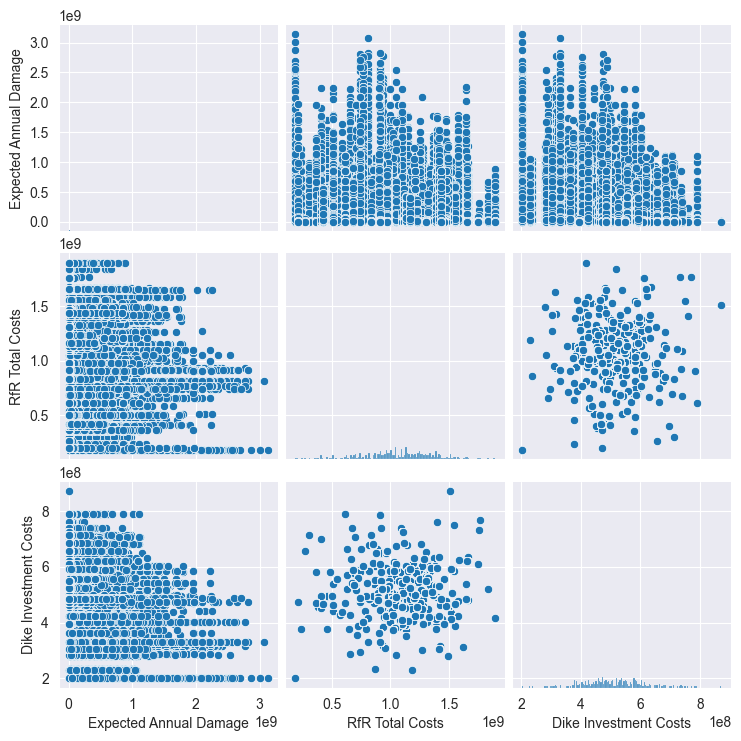

In [9]:
# Calculate and display pairwise relationships between outcome variables
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

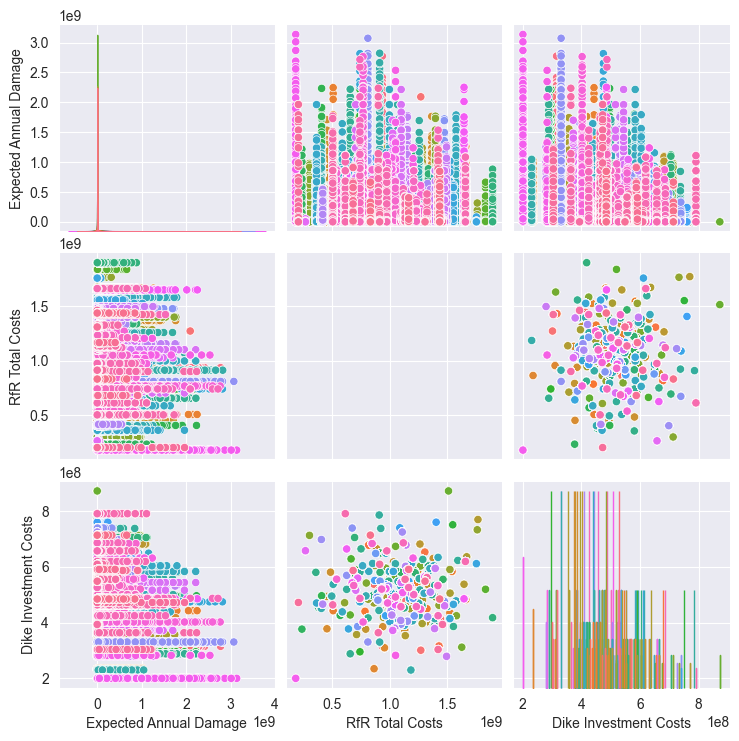

In [10]:
# Assign policy labels to the outcomes DataFrame
policies = experiments['policy']
data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

# Calculate and plot pairwise relationships, colored by policy
plot = sns.pairplot(data, hue='policy', vars=outcomes.keys())

# Remove legend for cleaner visualization
plot._legend.remove()

plt.show()

In [11]:
# Save experiment results to a compressed file for analysis
from ema_workbench import save_results

save_results(results, 'dike_open_exploration_results.tar.gz')

[MainProcess/INFO] results saved successfully to /Users/romyhuizer/PycharmProjects/group25_mbdm/final assignment/dike_open_exploration_results.tar.gz
